In [52]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  classification_report





**Load MNIST Data Set**

In [10]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['mnist_test.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving mnist_test.csv to mnist_test.csv


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving mnist_train.csv to mnist_train.csv


In [15]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [16]:
import sys
sys.path.append('drive/Project')


In [17]:
df_train.save('drive/Project/myModel.h5')


AttributeError: ignored

In [18]:
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


9

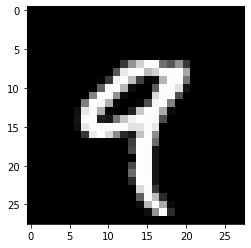

In [19]:
df_array_train = df_train.to_numpy()
X_train_original = df_array_train[:,1:]
plt.imshow(X_train_original[4].reshape(28,28), cmap='gray')
Y_train_original = df_array_train[:,0]
Y_train_original[4]

255

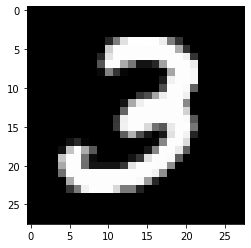

In [20]:

df_array_train_prm = df_array_train[np.random.RandomState(seed=42).permutation(df_array_train.shape[0])]
X_train = df_array_train_prm[:,1:]
Y_train = df_array_train_prm[:,0]
df_array_train_prm.shape
plt.imshow(X_train[4].reshape(28,28), cmap='gray')
#print('X4 =',  X_train[4],)
np.max(X_train)
#Y_train[4]

**Normalize Data**

In [21]:
X_train = X_train/255

**Split the Dataset into Train and Validation**

In [22]:
X_train_train = X_train[ :4800,:]
Y_train_train = Y_train[: 4800]

X_train_validation = X_train[4800:6000,: ]
Y_train_validation = Y_train[4800:6000]

In [23]:
X_train_train.shape

(4800, 784)

In [24]:
Y_train_train.shape

(4800,)

In [25]:
X_train_validation.shape

(1200, 784)

In [26]:
Y_train_validation.shape

(1200,)

# Test Set

In [27]:
df_array_test = df.to_numpy()
X_test = df_array_test[:,1:]
Y_test = df_array_test[:,0]
X_test = X_test/255
print(X_test.shape)
print(Y_test.shape)

(10000, 784)
(10000,)


In [28]:
import pickle
with open('train.pickle', 'wb') as f:
      pickle.dump([X_train_train, Y_train_train, X_train_validation,Y_train_validation, X_test, Y_test], f)


In [29]:
with open('train.pickle', 'rb') as f:
   X_train_train, Y_train_train, X_train_validation,Y_train_validation, X_test, Y_test = pickle.load(f)

# **LogisticRegression**


Resize the Dataset

In [30]:
# size=14
# X_train_train_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_train]
# X_train_validation_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_validation]
    
 
# X_train_train_re = [x.reshape(size*size) for x in X_train_train_re]
# X_train_validation_re = [x.reshape(size*size) for x in X_train_validation_re]

In [31]:
clf = LogisticRegression(random_state=42, max_iter=700, verbose=1, multi_class='ovr', n_jobs=-1)
clf.fit(X_train_train, Y_train_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [32]:
clf.score(X_train_train, Y_train_train)

0.9670833333333333

In [33]:
train_acc_LR = []
test_acc_LR = []
itr_LR =[]
for itr in range(10, 500, 50):
  clf_LR = LogisticRegression(random_state=42, max_iter=itr, verbose=0, multi_class='ovr', n_jobs=-1)
  clf_LR.fit(X_train_train, Y_train_train)
  train_acc_LR.append(clf_LR.score(X_train_train, Y_train_train))
  test_acc_LR.append(clf_LR.score(X_train_validation, Y_train_validation))
  itr_LR.append(itr)
  


[0.9025, 0.9091666666666667, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91]


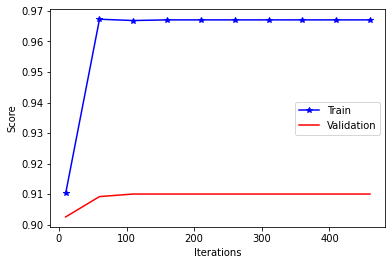

In [34]:
plt.plot(itr_LR, train_acc_LR, 'b*-', label = 'Train')
plt.plot(itr_LR, test_acc_LR, 'r-', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Iterations')
print(test_acc_LR)

In [35]:
#score_train
print('Optimum Numbers of iterations = ', itr_LR[np.argmax(test_acc_LR)])
print('Optimum Score = ', np.max(test_acc_LR))

Optimum Numbers of iterations =  110
Optimum Score =  0.91


In [38]:
itr_opt = itr_LR[np.argmax(test_acc_LR)] 
print(itr_opt)

110


In [42]:
  clf_LR_final = LogisticRegression(random_state=42, max_iter=itr_opt, verbose=0, multi_class='ovr', n_jobs=-1)
  clf_LR_final.fit(X_train_train, Y_train_train)

  clf_LR_final.score(X_test, Y_test)


0.9002

In [44]:
Y_pred = clf_LR_final.predict(X_test)

In [47]:
confusion_matrix(Y_test, Y_pred)

array([[ 946,    0,    4,    4,    3,    8,    8,    2,    3,    2],
       [   0, 1102,    3,    2,    0,    3,    3,    4,   18,    0],
       [  12,    8,  896,   18,   15,    6,   12,   17,   45,    3],
       [   7,    3,   18,  894,    2,   39,    2,   14,   25,    6],
       [   3,    2,    6,    1,  897,    0,    9,    2,    8,   54],
       [  15,    5,    5,   48,   11,  729,   22,   11,   32,   14],
       [  20,    3,    7,    3,   11,   10,  900,    1,    3,    0],
       [   3,   10,   18,    6,   16,    2,    0,  933,    3,   37],
       [  10,   16,    5,   21,   20,   37,   16,   18,  814,   17],
       [  12,    5,    3,   15,   32,   11,    0,   32,    8,  891]])

In [48]:
target_names = ['0', '1', '2','3','4','5','6','7','8','9']

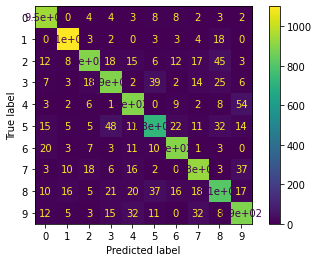

In [51]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred), display_labels=target_names).plot()

In [53]:
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.93      0.87      0.90      1032
           3       0.88      0.89      0.88      1010
           4       0.89      0.91      0.90       982
           5       0.86      0.82      0.84       892
           6       0.93      0.94      0.93       958
           7       0.90      0.91      0.90      1028
           8       0.85      0.84      0.84       974
           9       0.87      0.88      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# **KNN**

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_train, Y_train_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
knn.score(X_train_train, Y_train_train)

0.9704166666666667

In [56]:
score_train = []
score_test = []
num_neighbors =[]
for k in range(1,20,1):
  my_knn = KNeighborsClassifier(n_neighbors=k)
  my_knn.fit(X_train_train, Y_train_train)
  num_neighbors.append(k)
  score_test.append(my_knn.score(X_train_validation, Y_train_validation))
  score_train.append(my_knn.score(X_train_train, Y_train_train))

Text(0.5, 0, 'n_neighbors')

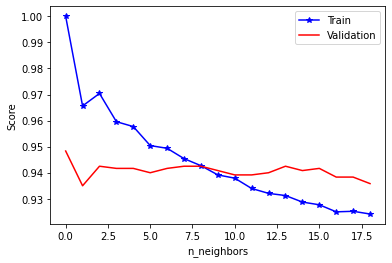

In [57]:
plt.plot(  score_train, 'b*-', label = 'Train')
plt.plot(score_test, 'r-', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('n_neighbors')


In [58]:
np.max(score_train)

1.0

In [59]:
num_neighbors_opt = num_neighbors[np.argmax(score_test)]
num_neighbors_opt

1

In [60]:
#score_train
print('Optimum Numbers of Neighbors = ', num_neighbors[np.argmax(score_test)])
print('Optimum Score = ', np.max(score_test))

Optimum Numbers of Neighbors =  1
Optimum Score =  0.9483333333333334


In [61]:
my_knn_opt = KNeighborsClassifier(n_neighbors=num_neighbors_opt)
my_knn_opt.fit(X_train_train, Y_train_train)

my_knn_opt.score(X_test,Y_test)

0.9346

In [62]:
Y_pred_KNN = my_knn_opt.predict(X_test)

In [63]:
confusion_matrix(Y_test, Y_pred_KNN)

array([[ 969,    1,    1,    0,    0,    3,    4,    1,    0,    1],
       [   0, 1126,    2,    0,    0,    0,    4,    2,    0,    1],
       [  23,   22,  936,    9,    1,    1,    3,   28,    8,    1],
       [   2,    4,    8,  936,    1,   25,    1,    8,   16,    9],
       [   0,   11,    0,    0,  890,    0,   10,    4,    1,   66],
       [   8,    3,    1,   25,    1,  825,   13,    2,    7,    7],
       [   7,    4,    2,    0,    1,    4,  936,    1,    2,    1],
       [   0,   30,    5,    1,    7,    0,    0,  959,    0,   26],
       [   8,    4,    8,   35,    8,   29,   10,   12,  843,   17],
       [   7,    4,    0,   11,   23,    7,    1,   26,    4,  926]])

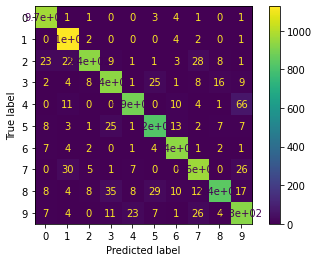

In [64]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_KNN), display_labels=target_names).plot()

In [65]:
print(classification_report(Y_test, Y_pred_KNN, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.97      0.91      0.94      1032
           3       0.92      0.93      0.92      1010
           4       0.95      0.91      0.93       982
           5       0.92      0.92      0.92       892
           6       0.95      0.98      0.96       958
           7       0.92      0.93      0.93      1028
           8       0.96      0.87      0.91       974
           9       0.88      0.92      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



# **Perceptron**

In [ ]:
perceptron = Perceptron(verbose=0)

In [ ]:
perceptron.fit(X_train_train, Y_train_train)

In [ ]:
perceptron.score(X_train_train, Y_train_train)

In [ ]:
score_train_perceptron = []
alpha_set = [0.00001, 0.0001, 0.001, 0.01, 0.01]
for k in alpha_set:
  perceptron = Perceptron(verbose=0, alpha=k)
  perceptron.fit(X_train_train, Y_train_train)
  score_train_perceptron.append(perceptron.score(X_train_validation, Y_train_validation))

In [ ]:
score_train_perceptron

In [ ]:
#score_train
print('Optimum alpha = ', alpha_set[np.argmax(score_train_perceptron)])
print('Optimum Score for Perceptron = ', np.max(score_train_perceptron))

In [ ]:
perceptron.fit(X_train_train, Y_train_train)

perceptron.score(X_test,Y_test)

# **MLP**

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50,), max_iter=1000)

In [67]:
mlp.fit(X_train_train, Y_train_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
mlp.score(X_train_train, Y_train_train)

1.0

Hidden Layer Size

In [ ]:
score_train_MLP = []
hidden_layer_size_set =[]
for k in range(5,50,5):
  mlp = MLPClassifier(hidden_layer_sizes=k, max_iter=1000) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  hidden_layer_size_set.append(k)

In [ ]:
print('Optimum Layer Size = ', hidden_layer_size_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

In [ ]:
mlp_opt_layer_size = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 

mlp_opt_layer_size.fit(X_train_train, Y_train_train)

mlp_opt_layer_size.score(X_test,Y_test)

Iteration


In [ ]:
score_train_MLP = []
Iteration_set =[]
for k in range(500,2000,250):
  mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=k) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  Iteration_set.append(k)

In [ ]:
print('Optimum Iteration = ', Iteration_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

Activation

In [ ]:
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
param_grid = dict(activation =activations)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.activation)

Solver


In [ ]:
solvers = np.array(['lbfgs', 'sgd', 'adam'])
param_grid = dict(solver =solvers)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.solver)

Exastive Search 

In [ ]:
score_test_MLP =[]
score_train_MLP = []
hidden_layer_size_set =[]
Iteration_set =[]
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
activations_set =[]
solvers = np.array(['lbfgs', 'sgd', 'adam'])
solvers_set = []
alphas = [0.00001, 0.0001, 0.001, ]#0.01, 0.1]
alpha_set=[]
for alphaa in alphas:
  for solv in solvers:
    for act in activations:
      for itr in range(500,1000,250):
        for k in  range(10,50,10): #range(5,50,5):
          #mlp = MLPClassifier(hidden_layer_sizes=k, activation=act, solver=solv, alpha=alphaa, max_iter=itr) 
          mlp = MLPClassifier(hidden_layer_sizes=k, alpha=alphaa, max_iter=itr) 

          mlp.fit(X_train_train, Y_train_train)
          score_test_MLP.append(mlp.score(X_train_validation, Y_train_validation))
          score_train_MLP.append(mlp.score(X_train_train, Y_train_train))
          hidden_layer_size_set.append(k)
          Iteration_set.append(itr)
          activations_set.append(act)
          solvers_set.append(solv)
          alpha_set.append(alphaa)

In [69]:
score_test_MLP =[]
score_train_MLP = []
hidden_layer_size_set =[]
Iteration_set =[]
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
activations_set =[]
solvers = np.array(['lbfgs', 'sgd', 'adam'])
solvers_set = []
#alphas = [0.00001, 0.0001, 0.001, ]#0.01, 0.1]
alpha_set=[]
for itr in range(500,1000,250):
  for k in  range(10,50,10): #range(5,50,5):
    mlp = MLPClassifier(hidden_layer_sizes=k,  max_iter=itr) 
    mlp.fit(X_train_train, Y_train_train)
    score_test_MLP.append(mlp.score(X_train_validation, Y_train_validation))
    score_train_MLP.append(mlp.score(X_train_train, Y_train_train))
    hidden_layer_size_set.append(k)
    Iteration_set.append(itr)
          #activations_set.append(act)
          #solvers_set.append(solv)
          #alpha_set.append(alphaa)

Text(0.5, 0, 'hidden layer size')

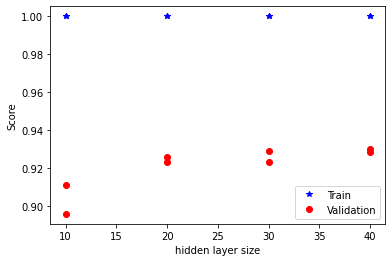

In [70]:
plt.plot(hidden_layer_size_set,  score_train_MLP, 'b*', label = 'Train')
plt.plot(hidden_layer_size_set, score_test_MLP, 'ro', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('hidden layer size')

In [71]:
print('Iteration = ', Iteration_set[np.argmax(score_test_MLP)])
print('hidden_layer_size_set = ', hidden_layer_size_set[np.argmax(score_test_MLP)])



Iteration =  750
hidden_layer_size_set =  40


In [73]:
itr_opt_MLP = Iteration_set[np.argmax(score_test_MLP)]
itr_opt_MLP

750

In [75]:
hidden_layer_size_opt = hidden_layer_size_set[np.argmax(score_test_MLP)]
hidden_layer_size_opt

40

In [76]:
    mlp_opt = MLPClassifier(hidden_layer_sizes= hidden_layer_size_opt,  max_iter=itr_opt_MLP) 


In [77]:

mlp_opt.fit(X_train_train, Y_train_train)

mlp_opt.score(X_test,Y_test)

0.93

In [78]:
Y_pred_MLP = mlp_opt.predict(X_test)

In [79]:
confusion_matrix(Y_test, Y_pred_MLP)

array([[ 947,    0,    0,    2,    2,   13,    7,    4,    3,    2],
       [   0, 1110,    4,    1,    1,    1,    6,    5,    7,    0],
       [  11,    4,  940,   19,   12,    4,   10,   11,   20,    1],
       [   5,    2,   19,  903,    1,   23,    3,   15,   32,    7],
       [   1,    1,    3,    2,  921,    1,   15,    3,    7,   28],
       [   9,    4,    1,   23,    4,  809,   20,    3,   12,    7],
       [  15,    3,   11,    1,    9,    8,  908,    1,    1,    1],
       [   2,    7,   15,    6,    9,    1,    0,  969,    0,   19],
       [   9,    2,    7,   14,   10,   15,   17,   14,  866,   20],
       [   9,    6,    2,   12,   28,    3,    0,   13,    9,  927]])

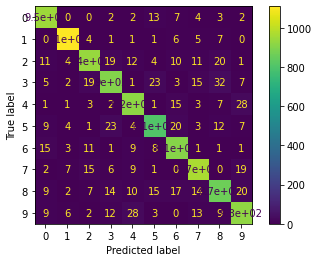

In [80]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_MLP), display_labels=target_names).plot()

In [82]:
print(classification_report(Y_test, Y_pred_MLP, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.91      0.92      1032
           3       0.92      0.89      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.92      0.91      0.91       892
           6       0.92      0.95      0.93       958
           7       0.93      0.94      0.94      1028
           8       0.90      0.89      0.90       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# **SVM**

In [83]:
svm = SVC(C=1.0, kernel='linear', probability=True)
svm.fit(X_train_train, Y_train_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
score_train_SVM = []
score_test_SVM = []
kernel_set =np.array(['linear', 'poly', 'rbf', 'sigmoid'])

for k in kernel_set:
  print(k)
  svm = SVC(C=1.0, kernel=k, probability=True)
  svm.fit(X_train_train, Y_train_train)
  score_test_SVM.append(svm.score(X_train_validation, Y_train_validation))
  score_train_SVM.append(svm.score(X_train_train, Y_train_train))

 

linear
poly
rbf
sigmoid


In [85]:
print('Optimum Kernel = ', kernel_set[np.argmax(score_test_SVM)])
print('Optimum Score for MLP = ', np.max(score_test_SVM))

Optimum Kernel =  rbf
Optimum Score for MLP =  0.9641666666666666


Text(0, 0.5, 'Score')

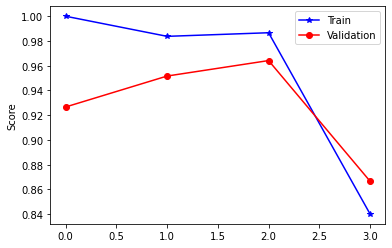

In [86]:
plt.plot(  score_train_SVM, 'b*-', label = 'Train')
plt.plot(score_test_SVM, 'ro-', label = 'Validation')
plt.legend()
plt.ylabel('Score')


In [88]:
  svm_opt = SVC(C=1.0, kernel='rbf', probability=True)


In [89]:
svm_opt.fit(X_train_train, Y_train_train)

svm_opt.score(X_test,Y_test)

0.9542

In [90]:
Y_pred_svm = svm_opt.predict(X_test)

In [91]:
confusion_matrix(Y_test, Y_pred_svm)

array([[ 969,    0,    1,    0,    0,    5,    3,    1,    1,    0],
       [   0, 1121,    2,    2,    1,    1,    4,    1,    3,    0],
       [   8,    0,  971,    8,    8,    0,   10,   12,   15,    0],
       [   2,    1,   12,  949,    0,   18,    1,   12,   12,    3],
       [   1,    0,    4,    0,  942,    1,    6,    1,    2,   25],
       [   3,    2,    5,   16,    4,  841,    9,    2,    6,    4],
       [  11,    3,    2,    1,    7,    5,  927,    0,    2,    0],
       [   1,    9,   17,    3,    5,    0,    0,  973,    2,   18],
       [   5,    0,    6,   10,    6,   14,    5,    8,  911,    9],
       [  10,    5,    0,   13,   20,    5,    0,   13,    5,  938]])

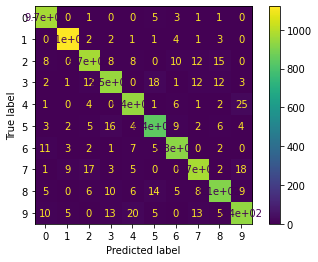

In [92]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_svm), display_labels=target_names).plot()

In [93]:
print(classification_report(Y_test, Y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.94      0.95      1032
           3       0.95      0.94      0.94      1010
           4       0.95      0.96      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# **DT**

In [94]:
score_train_dt = []
score_test_dt=[]
num_trees =[]
num_max_sample = []
for k in range(20,100,10):
  for s in range(50,300,50):
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=k,  max_samples=s, n_jobs=-1)
    clf.fit(X_train_train, Y_train_train)
    score_test_dt.append(clf.score(X_train_validation, Y_train_validation))
    score_train_dt.append(clf.score(X_train_train, Y_train_train))

    num_trees.append(k)
    num_max_sample.append(s)


In [95]:
print('Optimum number of trees = {}  and Optimum number of max_sample ={}' .format(num_trees[np.argmax(score_test_dt)], num_max_sample[np.argmax(score_test_dt)]))
print('Optimum Score for DT = ', np.max(score_test_dt))

Optimum number of trees = 90  and Optimum number of max_sample =250
Optimum Score for DT =  0.72


In [98]:
num_tree_opt = num_trees[np.argmax(score_test_dt)]
num_tree_opt

90

In [100]:
num_max_sample_opt = num_max_sample[np.argmax(score_test_dt)]
num_max_sample_opt

250

Text(0, 0.5, 'Score')

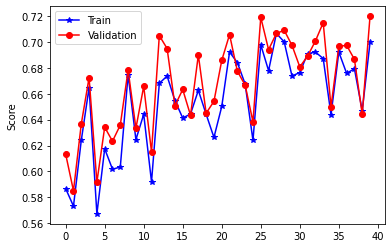

In [96]:
plt.plot( score_train_dt, 'b*-', label = 'Train')
plt.plot(score_test_dt, 'ro-', label = 'Validation')
plt.legend()
plt.ylabel('Score')

In [101]:
  DT_opt = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=num_tree_opt,  max_samples=num_max_sample_opt, n_jobs=-1)


In [102]:
DT_opt.fit(X_train_train, Y_train_train)

DT_opt.score(X_test,Y_test)

0.6505

In [103]:
Y_pred_dt = DT_opt.predict(X_test)

In [104]:
confusion_matrix(Y_test, Y_pred_dt)

array([[ 961,    2,    1,    1,    0,    0,    0,    5,    9,    1],
       [   0, 1076,   27,    1,    0,    0,    3,   16,   12,    0],
       [  97,  142,  558,   15,   25,    0,   35,   90,   70,    0],
       [  70,  124,   15,  646,   38,    9,    2,   51,   37,   18],
       [  26,    8,    4,    6,  816,    1,   29,   56,    9,   27],
       [ 169,   52,   17,  257,  135,   87,   28,   48,   58,   41],
       [ 132,   19,   31,    6,   75,    0,  641,   24,   29,    1],
       [  16,   40,   30,    2,   25,    0,    1,  903,    5,    6],
       [  23,  170,   17,   37,   58,    0,   18,   29,  607,   15],
       [  25,   37,    5,   36,  576,    1,    3,  110,    6,  210]])

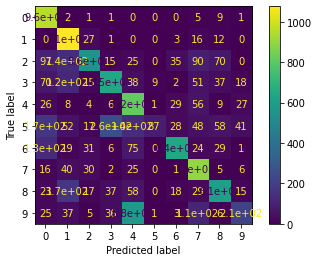

In [105]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_dt), display_labels=target_names).plot()

In [106]:
print(classification_report(Y_test, Y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       980
           1       0.64      0.95      0.77      1135
           2       0.79      0.54      0.64      1032
           3       0.64      0.64      0.64      1010
           4       0.47      0.83      0.60       982
           5       0.89      0.10      0.18       892
           6       0.84      0.67      0.75       958
           7       0.68      0.88      0.77      1028
           8       0.72      0.62      0.67       974
           9       0.66      0.21      0.32      1009

    accuracy                           0.65     10000
   macro avg       0.70      0.64      0.61     10000
weighted avg       0.69      0.65      0.62     10000



# **Random Forest**

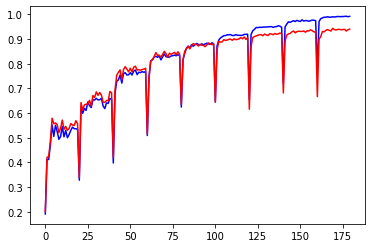

In [107]:
train_acc = []
test_acc = []
n_list =[]
depth_list = []
for depth in range(1, 10, 1):
  for n in range(1, 200, 10):
      clf = RandomForestClassifier(n_estimators=n, max_depth=depth, n_jobs=-1)
      clf.fit(X_train_train, Y_train_train)
      
      train_acc.append(clf.score(X_train_train, Y_train_train))
      test_acc.append(clf.score(X_train_validation, Y_train_validation))
      n_list.append(n)
      depth_list.append(depth)
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

In [109]:
print('Optimum n_estimators = ', n_list[np.argmax(test_acc)])
print('Optimum depth = ', depth_list[np.argmax(test_acc)])
print('Optimum Score of Validation = ', np.max(test_acc))
print('Train Score', train_acc[np.argmax(test_acc)])


Optimum n_estimators =  91
Optimum depth =  9
Optimum Score of Validation =  0.9433333333333334
Train Score 0.9902083333333334


In [111]:
n_estimators_opt = n_list[np.argmax(test_acc)]


In [112]:
depth_opt = depth_list[np.argmax(test_acc)]

In [113]:
rf_opt = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=depth_opt, n_jobs=-1)

In [114]:
rf_opt.fit(X_train_train, Y_train_train)

rf_opt.score(X_test,Y_test)

0.9273

In [115]:
Y_pred_rf = rf_opt.predict(X_test)

In [116]:
confusion_matrix(Y_test, Y_pred_rf)

array([[ 967,    0,    0,    0,    0,    6,    4,    1,    2,    0],
       [   0, 1118,    3,    2,    0,    3,    3,    0,    6,    0],
       [  10,    3,  940,   15,   10,    3,   11,   28,   11,    1],
       [   5,    1,   18,  910,    2,   29,    0,   15,   18,   12],
       [   3,    1,    4,    0,  890,    0,   13,    3,   10,   58],
       [   7,   11,    0,   36,    9,  790,   19,    4,    7,    9],
       [  20,    4,    1,    1,   10,    7,  911,    0,    4,    0],
       [   1,   12,   28,    2,    9,    1,    0,  927,    3,   45],
       [   4,    5,    7,   14,    6,    8,   11,    7,  884,   28],
       [   7,    7,    3,   14,   14,    3,    3,   11,   11,  936]])

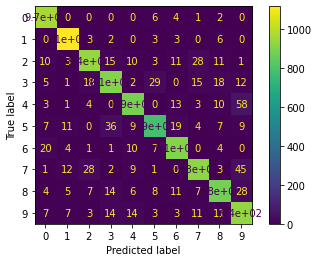

In [117]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred_rf), display_labels=target_names).plot()

In [118]:
print(classification_report(Y_test, Y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.91      0.92      1032
           3       0.92      0.90      0.91      1010
           4       0.94      0.91      0.92       982
           5       0.93      0.89      0.91       892
           6       0.93      0.95      0.94       958
           7       0.93      0.90      0.92      1028
           8       0.92      0.91      0.92       974
           9       0.86      0.93      0.89      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

